process an image in notebook  

using new code in `fringeprocess.py`
- `fringeprocess.circle_mask_pklist`
- `fringeprocess.gauge_initial_column`

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ls_fringeapp import fringeprocess as fp
from ls_fringeapp.load_equipment_data import repo_folder
from ls_fringeapp import plot_helpers as ph

Equipment Register loaded from /home/elfnor/gits/Length_Stds_Equipment_Register/register.xml
{'red': 632.991212579, 'green': 532.245576449053}


In [3]:
image_folder = repo_folder / "tests" / "data" / "mock_square_gauges"
img_filename = image_folder / "g1.bmp"

In [4]:
img = Image.open(img_filename)
img_array = np.asarray(img)
if img_array.ndim > 2:
    img_array = img_array.mean(axis=2)

In [5]:
xygb = np.array(
    [
        [146.0, 180.0],
        [
            931.0,
            180.0,
        ],
        [931.0, 946.0],
    ]
)

In [6]:
# without circle mask
ffrac, drawdata = fp.array2frac(img_array, xygb, drawinfo=True)
ffrac

np.float64(0.37929538587759826)

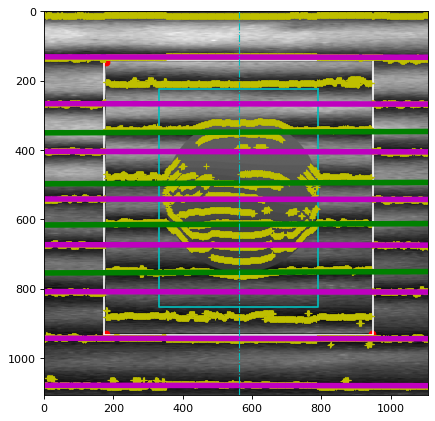

In [7]:
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ph.draw_gauge(axes, img_array, drawdata)

In [8]:
# with circle mask
radius = 0.32
ffrac, drawdata = fp.array2frac(
    img_array, xygb, drawinfo=True, circle_radius=radius, border=(0.05, 0.05)
)
ffrac

np.float64(0.4855164352261161)

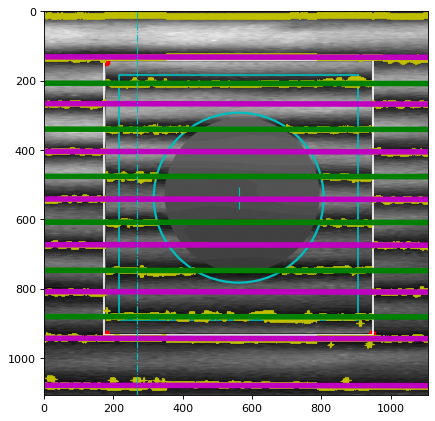

In [9]:
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ph.draw_gauge(axes, img_array, drawdata)